In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from nltk.corpus import stopwords
import string

In [2]:
from google.colab import drive 
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [3]:
data=pd.read_csv('gdrive/My Drive/CSE_243/Processed_major_cols.csv')

In [4]:
data.head()

,Unnamed: 0,tweets_Text,has_image,has_Link,tweets_ResponseCategory
0,0,initial reports suggest three rockets struck b...,0,0,1
1,1,senate approved stopgap spending bill order av...,1,1,2
2,2,seven people shot funeral home milwaukee treat...,1,1,1
3,3,clare bronfman heiress seagram liquor fortune ...,1,1,0
4,4,trump plans participate next two presidential ...,1,0,2


In [5]:
labels = data["tweets_ResponseCategory"]
data.drop("tweets_ResponseCategory", axis=1, inplace=True)

In [6]:
X_train, X_val, y_train, y_val = train_test_split(data, labels, test_size=0.20, random_state=42)

In [7]:
X_train.head()

,Unnamed: 0,tweets_Text,has_image,has_Link
715,715,another 24 million americans filed firsttime u...,1,1
809,809,jared kushner attempts clarify comments questi...,1,1
3205,3206,english soccer team leicester city says billio...,1,0
7532,7536,british airways says computer systems fixed ou...,1,0
6435,6439,green slime oozed onto detroit interstate stop...,1,0


Word Cloud

In [8]:
dataTrain=pd.concat([X_train, y_train], axis=1)

In [9]:
dataTrain.head()

,Unnamed: 0,tweets_Text,has_image,has_Link,tweets_ResponseCategory
715,715,another 24 million americans filed firsttime u...,1,1,1
809,809,jared kushner attempts clarify comments questi...,1,1,2
3205,3206,english soccer team leicester city says billio...,1,0,1
7532,7536,british airways says computer systems fixed ou...,1,0,0
6435,6439,green slime oozed onto detroit interstate stop...,1,0,2


In [10]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [11]:
# word cloud

low_df = dataTrain.loc[dataTrain.tweets_ResponseCategory  == 0]
moderate_df = dataTrain.loc[dataTrain.tweets_ResponseCategory == 1]
high_df = dataTrain.loc[dataTrain.tweets_ResponseCategory  == 2]


low_array = np.array(low_df['tweets_Text'])
moderate_array=np.array(moderate_df['tweets_Text'])
high_array=np.array(high_df['tweets_Text'])

low_text = ''.join(low_array)
moderate_text= ''.join(moderate_array)
high_text=''.join(high_array)

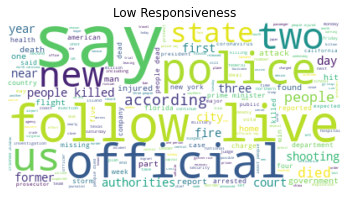

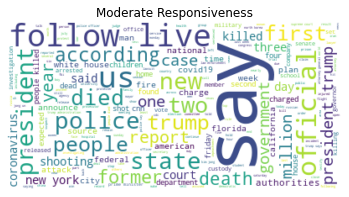

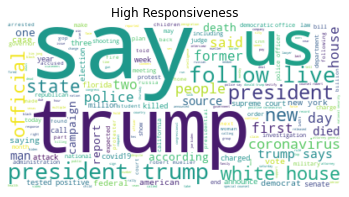

In [12]:
#low
wordcloud = WordCloud(background_color="white").generate(low_text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Low Responsiveness')
plt.show()

#moderate
wordcloud = WordCloud(background_color="white").generate(moderate_text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Moderate Responsiveness')
plt.show()

#high
wordcloud = WordCloud(background_color="white").generate(high_text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('High Responsiveness')
plt.show()

# Tokenizer

In [13]:
max_len=X_train.tweets_Text.map(lambda x: len(x)).max() 
print(max_len)

222


In [14]:
def get_tweetText(data):
    data_text=data[['tweets_Text']]
    return data_text

In [15]:
train_text=get_tweetText(X_train)
val_text=get_tweetText(X_val)

In [16]:
max_features=25000

In [17]:
from keras.utils import to_categorical
def tokenizer_(train_x, val_x, max_features, maxlen):
    

    train_X = train_x['tweets_Text']
    val_X = val_x['tweets_Text']
    

    tokenizer = Tokenizer(num_words=max_features)
    tokenizer.fit_on_texts(list(train_X))

    train_X = tokenizer.texts_to_sequences(train_X)
    train_X = pad_sequences(train_X, maxlen=maxlen)
    val_X = tokenizer.texts_to_sequences(val_X)
    val_X = pad_sequences(val_X, maxlen=maxlen)

    return train_X, val_X, tokenizer

In [18]:
train_X_tokenized, val_X_tokenized , tokenizer= tokenizer_(X_train, X_val, max_features, max_len)

Label Encoding 

In [19]:
from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_train_le = le.fit_transform(y_train)
y_val_le = le.transform(y_val)
##THESE are the final labels
train_Y = to_categorical(y_train_le)
val_Y = to_categorical(y_val_le)

Complete dataframe

In [20]:
#X_train_new = X_train.reset_index(drop=True)
#train_X_tokenized_new = train_X_tokenized.reset_index(drop=True)

In [21]:
#X_val_new = X_val.reset_index(drop=True)
#val_X_tokenized_new = val_X_tokenized.reset_index(drop=True)

In [22]:
X_train_new=X_train[:]
X_val_new=X_val[:]

In [23]:
X_train_new.drop(["tweets_Text"], axis=1, inplace=True)
X_val_new.drop(["tweets_Text"], axis=1, inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [24]:
X_train_new.head()

,Unnamed: 0,has_image,has_Link
715,715,1,1
809,809,1,1
3205,3206,1,0
7532,7536,1,0
6435,6439,1,0


In [25]:
X_train_new = X_train_new.loc[:, ~X_train_new.columns.str.contains('^Unnamed')]

In [26]:
X_val_new = X_val_new.loc[:, ~X_val_new.columns.str.contains('^Unnamed')]

In [27]:
X_train_new.to_numpy()
X_val_new.to_numpy()

array([[0, 0],
       [1, 0],
       [1, 0],
       ...,
       [1, 0],
       [1, 0],
       [1, 0]])

In [28]:
X_train_new[:4]

,has_image,has_Link
715,1,1
809,1,1
3205,1,0
7532,1,0


In [29]:
X_train_df=np.concatenate(( train_X_tokenized, X_train_new), axis=1)


In [30]:
X_val_df=np.concatenate((val_X_tokenized, X_val_new), axis=1)

In [31]:
X_train_df[:4]

array([[   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0, 

In [32]:
X_val_df=np.concatenate((X_val_new, val_X_tokenized), axis=1)

In [33]:
X_val_df.shape

(1988, 224)

# Models

In [34]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation, Conv1D
from keras.layers import Bidirectional, GlobalMaxPool1D
from keras.models import Model
from keras import initializers, regularizers, constraints, optimizers, layers
from keras.models import Sequential
from keras import layers
from keras import models

**Feature SET**



Tweets Only Train_X: **train_X_tokenized**


Tweets Only Val_X: **val_X_tokenized**

Tweets, Image, hasLink Train_X: **X_train_df**

Tweets, Image, hasLink Val_X: **X_val_df**

Training Label: **train_Y**

Validation Label: **val_Y**

# 1. Vanilla RNN 

# 1.1 Feature:Only Tweet Text

The feature set only has the tweet

In [35]:
vanilla_rnn = models.Sequential()
vanilla_rnn.add(layers.Embedding(max_features, 8, input_length=max_len))
vanilla_rnn.add(layers.SimpleRNN(128))
#vanilla_rnn.add(layers.Flatten())
vanilla_rnn.add(layers.Dense(3, activation='softmax'))
vanilla_rnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 222, 8)            200000    
_________________________________________________________________
simple_rnn (SimpleRNN)       (None, 128)               17536     
_________________________________________________________________
dense (Dense)                (None, 3)                 387       
Total params: 217,923
Trainable params: 217,923
Non-trainable params: 0
_________________________________________________________________


In [36]:
vanilla_rnn.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

from tensorflow.keras.callbacks import EarlyStopping
#callbacks = EarlyStopping(monitor='val_loss', min_delta=0, patience = 2)
history = vanilla_rnn.fit(train_X_tokenized,
                    train_Y, 
                    batch_size=50, 
                    epochs=10, 
                    validation_data=(val_X_tokenized, val_Y)
                    #callbacks=callbacks
                    )

Epoch 1/10
160/160 [==============================] - 23s 141ms/step - loss: 1.1057 - accuracy: 0.3419 - val_loss: 1.1119 - val_accuracy: 0.3476
Epoch 2/10
160/160 [==============================] - 22s 139ms/step - loss: 1.0984 - accuracy: 0.3588 - val_loss: 1.1044 - val_accuracy: 0.3421
Epoch 3/10
160/160 [==============================] - 22s 138ms/step - loss: 1.0643 - accuracy: 0.4386 - val_loss: 1.1000 - val_accuracy: 0.3441
Epoch 4/10
160/160 [==============================] - 22s 139ms/step - loss: 1.0512 - accuracy: 0.4826 - val_loss: 1.0805 - val_accuracy: 0.3828
Epoch 5/10
160/160 [==============================] - 22s 140ms/step - loss: 0.9484 - accuracy: 0.5921 - val_loss: 1.0863 - val_accuracy: 0.4024
Epoch 6/10
160/160 [==============================] - 23s 141ms/step - loss: 0.7529 - accuracy: 0.6929 - val_loss: 1.1551 - val_accuracy: 0.4286
Epoch 7/10
160/160 [==============================] - 22s 139ms/step - loss: 0.5030 - accuracy: 0.8073 - val_loss: 1.2896 - val_ac

# 1.2  Feature: Tweets+ links and image column

In [37]:
vanilla_rnn2 = models.Sequential()
vanilla_rnn2.add(layers.Embedding(max_features, 8, input_length=max_len+2))
vanilla_rnn2.add(layers.SimpleRNN(128))
#vanilla_rnn.add(layers.Flatten())
vanilla_rnn2.add(layers.Dense(3, activation='softmax'))
vanilla_rnn2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 224, 8)            200000    
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 128)               17536     
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 387       
Total params: 217,923
Trainable params: 217,923
Non-trainable params: 0
_________________________________________________________________


In [38]:
vanilla_rnn2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

from tensorflow.keras.callbacks import EarlyStopping
#callbacks = EarlyStopping(monitor='val_loss', min_delta=0, patience = 2)
history = vanilla_rnn2.fit(X_train_df,
                    train_Y, 
                    batch_size=32, 
                    epochs=50, 
                    validation_data=(X_val_df, val_Y)
                    #callbacks=callbacks
                    )

Epoch 1/50
249/249 [==============================] - 36s 146ms/step - loss: 1.1126 - accuracy: 0.3369 - val_loss: 1.1061 - val_accuracy: 0.3094
Epoch 2/50
249/249 [==============================] - 37s 148ms/step - loss: 1.1133 - accuracy: 0.3321 - val_loss: 1.1262 - val_accuracy: 0.3184
Epoch 3/50
249/249 [==============================] - 37s 147ms/step - loss: 1.1104 - accuracy: 0.3321 - val_loss: 1.1106 - val_accuracy: 0.3431
Epoch 4/50
249/249 [==============================] - 37s 149ms/step - loss: 1.1118 - accuracy: 0.3431 - val_loss: 1.1038 - val_accuracy: 0.3516
Epoch 5/50
 48/249 [====>.........................] - ETA: 27s - loss: 1.0969 - accuracy: 0.3516

KeyboardInterrupt: ignored

In [ ]:
# plot history
# Plot training & validation accuracy values
import matplotlib.pyplot as plt 
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Vanilla RNN accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Vanilla RNN loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# 2. LSTM

2.1 Feature: Only Tweet Text

2.2 Feature: Tweet Text+ Image and hasLink cols

In [39]:
model = Sequential()

# Input / Embdedding
model.add(Embedding(max_features,100,mask_zero=True))
model.add(LSTM(64,return_sequences=True))
model.add(LSTM(32,return_sequences=False))

# Output layer
model.add(Dense(3, activation='softmax'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 100)         2500000   
_________________________________________________________________
lstm (LSTM)                  (None, None, 64)          42240     
_________________________________________________________________
lstm_1 (LSTM)                (None, 32)                12416     
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 99        
Total params: 2,554,755
Trainable params: 2,554,755
Non-trainable params: 0
_________________________________________________________________


In [40]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

from tensorflow.keras.callbacks import EarlyStopping
callbacks = EarlyStopping(monitor='val_loss', min_delta=0, patience = 2)
history = model.fit(X_train_df, 
                    train_Y, 
                    batch_size=50, 
                    epochs=50, 
                    validation_data=(X_val_df, val_Y),
                    callbacks=callbacks
                    )

Epoch 1/50
119/160 [=====================>........] - ETA: 38s - loss: 0.9907 - accuracy: 0.4835

KeyboardInterrupt: ignored

In [ ]:
# plot history
# Plot training & validation accuracy values
import matplotlib.pyplot as plt 
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('LSTM accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('LSTM loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# 3. LSTM+ GloVe Embeddings

In [41]:
vocab_size = len(tokenizer.word_index) + 1

In [42]:
from numpy import array
from numpy import asarray
from numpy import zeros

embeddings_dictionary = dict()
#glove_file = open('gdrive/My Drive/HW3_CSE243/sentiment analysis assignment/glove.6B.100d.txt', encoding="utf8")
glove_file = open('gdrive/My Drive/CSE_243/glove.twitter.27B.100d.txt', encoding="utf8")

for line in glove_file:
    records = line.split()
    word = records[0]
    vector_dimensions = asarray(records[1:], dtype='float32')
    embeddings_dictionary [word] = vector_dimensions
glove_file.close()

In [43]:
embedding_matrix = zeros((vocab_size, 100))
for word, index in tokenizer.word_index.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector

3.1 Architecture 1: Feature: Only 

In [44]:
glove_model = models.Sequential()
glove_model.add(layers.Embedding(vocab_size,
                            100,
                            weights=[embedding_matrix],
                            input_length=max_len,
                            trainable=False))
#glove_model.add(layers.LSTM(64))
glove_model.add(LSTM(64,return_sequences=True))
glove_model.add(LSTM(32,return_sequences=False))
#glove_model.add(layers.Dense(10,activation="relu"))
#glove_model.add(layers.Dropout(0.2))
glove_model.add(Dense(3, activation='softmax'))
glove_model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 222, 100)          1427500   
_________________________________________________________________
lstm_2 (LSTM)                (None, 222, 64)           42240     
_________________________________________________________________
lstm_3 (LSTM)                (None, 32)                12416     
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 99        
Total params: 1,482,255
Trainable params: 54,755
Non-trainable params: 1,427,500
_________________________________________________________________


In [45]:
glove_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

from tensorflow.keras.callbacks import EarlyStopping
#callbacks = EarlyStopping(monitor='val_loss', min_delta=0, patience = 2)
history = glove_model.fit(train_X_tokenized, 
                    train_Y, 
                    batch_size=100, 
                    epochs=50, 
                    validation_data=(val_X_tokenized, val_Y)
                    #callbacks=callbacks
                    )

Epoch 1/50
80/80 [==============================] - 3s 33ms/step - loss: 1.0295 - accuracy: 0.4513 - val_loss: 0.9850 - val_accuracy: 0.5010
Epoch 2/50
80/80 [==============================] - 2s 23ms/step - loss: 0.9612 - accuracy: 0.5131 - val_loss: 0.9872 - val_accuracy: 0.4945
Epoch 3/50
80/80 [==============================] - 2s 23ms/step - loss: 0.9381 - accuracy: 0.5347 - val_loss: 0.9513 - val_accuracy: 0.5101
Epoch 4/50
80/80 [==============================] - 2s 23ms/step - loss: 0.9082 - accuracy: 0.5558 - val_loss: 0.9363 - val_accuracy: 0.5352
Epoch 5/50
80/80 [==============================] - 2s 23ms/step - loss: 0.8772 - accuracy: 0.5817 - val_loss: 0.9393 - val_accuracy: 0.5221
Epoch 6/50
80/80 [==============================] - 2s 23ms/step - loss: 0.8449 - accuracy: 0.6007 - val_loss: 0.9384 - val_accuracy: 0.5252
Epoch 7/50
80/80 [==============================] - 2s 23ms/step - loss: 0.8157 - accuracy: 0.6156 - val_loss: 0.9397 - val_accuracy: 0.5503
Epoch 8/50
80

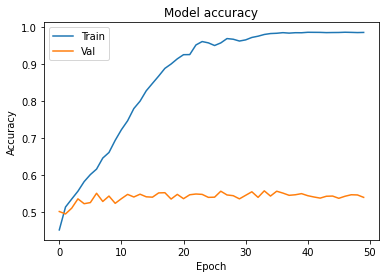

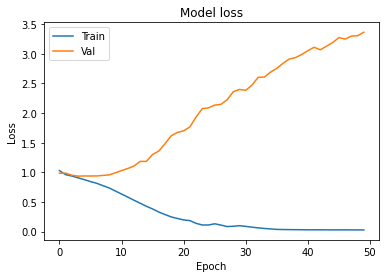

In [46]:
# plot history
# Plot training & validation accuracy values
import matplotlib.pyplot as plt 
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

Feature: Tweets+Image,hasLink

In [47]:
glove_model_feature2 = models.Sequential()
glove_model_feature2.add(layers.Embedding(vocab_size,
                            100,
                            weights=[embedding_matrix],
                            input_length=max_len+2,
                            trainable=False))
#glove_model.add(layers.LSTM(64))
glove_model_feature2.add(LSTM(64,return_sequences=True))
glove_model_feature2.add(LSTM(32,return_sequences=False))
#glove_model.add(layers.Dense(10,activation="relu"))
#glove_model.add(layers.Dropout(0.2))
glove_model_feature2.add(Dense(3, activation='softmax'))
glove_model_feature2.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 224, 100)          1427500   
_________________________________________________________________
lstm_4 (LSTM)                (None, 224, 64)           42240     
_________________________________________________________________
lstm_5 (LSTM)                (None, 32)                12416     
_________________________________________________________________
dense_4 (Dense)              (None, 3)                 99        
Total params: 1,482,255
Trainable params: 54,755
Non-trainable params: 1,427,500
_________________________________________________________________


In [48]:
glove_model_feature2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

from tensorflow.keras.callbacks import EarlyStopping
#callbacks = EarlyStopping(monitor='val_loss', min_delta=0, patience = 2)
history = glove_model_feature2.fit(X_train_df, 
                    train_Y, 
                    batch_size=100, 
                    epochs=50, 
                    validation_data=(X_val_df, val_Y)
                    #callbacks=callbacks
                    )

Epoch 1/50
80/80 [==============================] - 3s 34ms/step - loss: 1.0250 - accuracy: 0.4572 - val_loss: 0.9901 - val_accuracy: 0.4940
Epoch 2/50
80/80 [==============================] - 2s 23ms/step - loss: 0.9609 - accuracy: 0.5122 - val_loss: 0.9633 - val_accuracy: 0.5146
Epoch 3/50
80/80 [==============================] - 2s 23ms/step - loss: 0.9384 - accuracy: 0.5400 - val_loss: 0.9508 - val_accuracy: 0.5317
Epoch 4/50
80/80 [==============================] - 2s 23ms/step - loss: 0.9088 - accuracy: 0.5581 - val_loss: 0.9377 - val_accuracy: 0.5322
Epoch 5/50
80/80 [==============================] - 2s 23ms/step - loss: 0.8856 - accuracy: 0.5668 - val_loss: 0.9354 - val_accuracy: 0.5382
Epoch 6/50
80/80 [==============================] - 2s 23ms/step - loss: 0.8471 - accuracy: 0.5953 - val_loss: 0.9346 - val_accuracy: 0.5352
Epoch 7/50
80/80 [==============================] - 2s 23ms/step - loss: 0.8131 - accuracy: 0.6220 - val_loss: 0.9510 - val_accuracy: 0.5342
Epoch 8/50
80

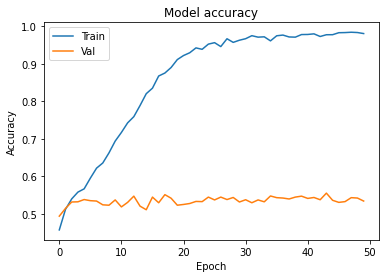

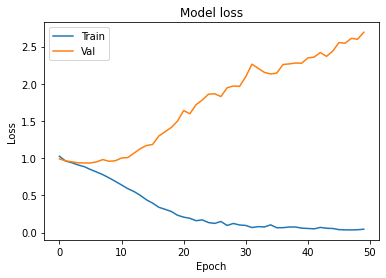

In [49]:
# plot history
# Plot training & validation accuracy values
import matplotlib.pyplot as plt 
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

**Architecture 2**

In [50]:
glove_model2 = models.Sequential()
glove_model2.add(layers.Embedding(vocab_size,
                            100,
                            weights=[embedding_matrix],
                            input_length=max_len,
                            trainable=False))
#glove_model.add(layers.LSTM(64))
glove_model2.add(LSTM(128,return_sequences=True))
glove_model2.add(LSTM(64,return_sequences=True))
glove_model2.add(LSTM(32,return_sequences=False))
glove_model2.add(layers.Dense(10,activation="relu"))
#glove_model2.add(layers.Dense(10,activation="relu"))
#glove_model.add(layers.Dropout(0.2))
glove_model2.add(Dense(3, activation='softmax'))
glove_model2.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 222, 100)          1427500   
_________________________________________________________________
lstm_6 (LSTM)                (None, 222, 128)          117248    
_________________________________________________________________
lstm_7 (LSTM)                (None, 222, 64)           49408     
_________________________________________________________________
lstm_8 (LSTM)                (None, 32)                12416     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                330       
_________________________________________________________________
dense_6 (Dense)              (None, 3)                 33        
Total params: 1,606,935
Trainable params: 179,435
Non-trainable params: 1,427,500
______________________________________

In [51]:
glove_model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

from tensorflow.keras.callbacks import EarlyStopping

history = glove_model2.fit(train_X_tokenized, 
                    train_Y, 
                    batch_size=100, 
                    epochs=50, 
                    validation_data=(val_X_tokenized, val_Y)
                   
                    )

Epoch 1/50
80/80 [==============================] - 4s 50ms/step - loss: 1.0198 - accuracy: 0.4655 - val_loss: 0.9820 - val_accuracy: 0.5060
Epoch 2/50
80/80 [==============================] - 3s 37ms/step - loss: 0.9679 - accuracy: 0.5091 - val_loss: 0.9618 - val_accuracy: 0.5126
Epoch 3/50
80/80 [==============================] - 3s 38ms/step - loss: 0.9427 - accuracy: 0.5329 - val_loss: 0.9597 - val_accuracy: 0.5126
Epoch 4/50
80/80 [==============================] - 3s 38ms/step - loss: 0.9107 - accuracy: 0.5506 - val_loss: 0.9333 - val_accuracy: 0.5257
Epoch 5/50
80/80 [==============================] - 3s 38ms/step - loss: 0.8795 - accuracy: 0.5819 - val_loss: 0.9335 - val_accuracy: 0.5382
Epoch 6/50
80/80 [==============================] - 3s 38ms/step - loss: 0.8404 - accuracy: 0.6045 - val_loss: 0.9652 - val_accuracy: 0.5126
Epoch 7/50
80/80 [==============================] - 3s 38ms/step - loss: 0.8058 - accuracy: 0.6231 - val_loss: 0.9532 - val_accuracy: 0.5478
Epoch 8/50
80

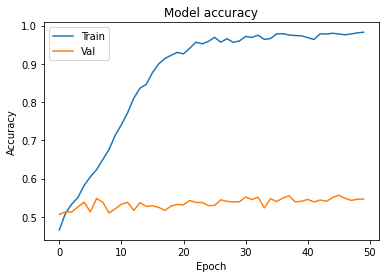

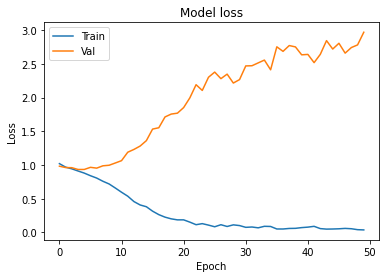

In [52]:
# plot history
# Plot training & validation accuracy values
import matplotlib.pyplot as plt 
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

**Feature: Tweets+Image,hasLink**

In [53]:
glove_model2_feature2 = models.Sequential()
glove_model2_feature2.add(layers.Embedding(vocab_size,
                            100,
                            weights=[embedding_matrix],
                            input_length=max_len+2,
                            trainable=False))
#glove_model.add(layers.LSTM(64))
glove_model2_feature2.add(LSTM(128,return_sequences=True))
glove_model2_feature2.add(LSTM(64,return_sequences=True))
glove_model2_feature2.add(LSTM(32,return_sequences=False))
glove_model2_feature2.add(layers.Dense(10,activation="relu"))
#glove_model2.add(layers.Dense(10,activation="relu"))
#glove_model.add(layers.Dropout(0.2))
glove_model2_feature2.add(Dense(3, activation='softmax'))
glove_model2_feature2.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, 224, 100)          1427500   
_________________________________________________________________
lstm_9 (LSTM)                (None, 224, 128)          117248    
_________________________________________________________________
lstm_10 (LSTM)               (None, 224, 64)           49408     
_________________________________________________________________
lstm_11 (LSTM)               (None, 32)                12416     
_________________________________________________________________
dense_7 (Dense)              (None, 10)                330       
_________________________________________________________________
dense_8 (Dense)              (None, 3)                 33        
Total params: 1,606,935
Trainable params: 179,435
Non-trainable params: 1,427,500
______________________________________

In [54]:
X_train_df.shape

(7952, 224)

In [55]:
glove_model2_feature2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

from tensorflow.keras.callbacks import EarlyStopping

history = glove_model2_feature2.fit(X_train_df, 
                    train_Y, 
                    batch_size=100, 
                    epochs=50, 
                    validation_data=(X_val_df, val_Y)
                   
                    )

Epoch 1/50
80/80 [==============================] - 4s 51ms/step - loss: 1.0308 - accuracy: 0.4430 - val_loss: 0.9775 - val_accuracy: 0.4925
Epoch 2/50
80/80 [==============================] - 3s 38ms/step - loss: 0.9672 - accuracy: 0.5086 - val_loss: 0.9892 - val_accuracy: 0.5191
Epoch 3/50
80/80 [==============================] - 3s 38ms/step - loss: 0.9430 - accuracy: 0.5269 - val_loss: 0.9532 - val_accuracy: 0.5161
Epoch 4/50
80/80 [==============================] - 3s 38ms/step - loss: 0.9162 - accuracy: 0.5415 - val_loss: 0.9452 - val_accuracy: 0.5292
Epoch 5/50
80/80 [==============================] - 3s 38ms/step - loss: 0.8888 - accuracy: 0.5622 - val_loss: 0.9501 - val_accuracy: 0.5211
Epoch 6/50
80/80 [==============================] - 3s 38ms/step - loss: 0.8593 - accuracy: 0.5888 - val_loss: 0.9607 - val_accuracy: 0.5196
Epoch 7/50
80/80 [==============================] - 3s 38ms/step - loss: 0.8224 - accuracy: 0.6089 - val_loss: 0.9742 - val_accuracy: 0.5126
Epoch 8/50
80

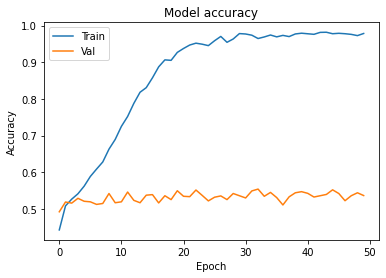

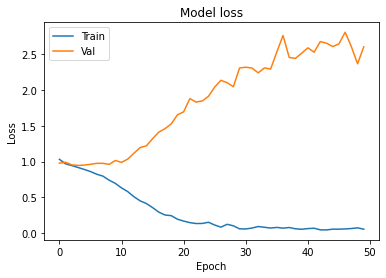

In [56]:
# plot history
# Plot training & validation accuracy values
import matplotlib.pyplot as plt 
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()